In [1]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=f7cfeaee0fd08ec8491462036cc92d5c0d01f83e16e8a985204f77f1539cbc5b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import skfuzzy as skfuzzy

base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [3]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base["BILL_AMT2"] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [5]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [6]:
X = base.iloc[:,[1,25]].values

In [7]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [10]:
X.shape

(30000, 2)

In [11]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [14]:
r

(array([[ 0.7496819 ,  2.01629996],
        [-0.73888463, -0.30174391],
        [ 0.97537691, -0.42055403]]),
 array([[0.02592765, 0.02732556, 0.00499033, ..., 0.01492012, 0.01406304,
         0.00906612],
        [0.91181803, 0.848655  , 0.97914585, ..., 0.95010629, 0.95613004,
         0.97292015],
        [0.06225432, 0.12401944, 0.01586382, ..., 0.03497359, 0.02980692,
         0.01801373]]),
 array([[0.3535478 , 0.68508652, 0.42611271, ..., 0.21254207, 0.55049775,
         0.26815733],
        [0.23112461, 0.07990818, 0.12505962, ..., 0.30610129, 0.44601051,
         0.26584153],
        [0.41532759, 0.2350053 , 0.44882767, ..., 0.48135664, 0.00349174,
         0.46600114]]),
 array([[3.29944208, 2.90506835, 2.80412003, ..., 3.11980483, 2.47542575,
         2.68884009],
        [0.55637551, 0.52128509, 0.20018781, ..., 0.3909556 , 0.30021405,
         0.25955957],
        [2.12930234, 1.36362831, 1.57274191, ..., 2.03771484, 1.70032096,
         1.90754049]]),
 array([25741.219201

In [15]:
previsoes_porcentagem = r[1]

In [16]:
previsoes_porcentagem.shape

(3, 30000)

In [17]:
previsoes_porcentagem

array([[0.02592765, 0.02732556, 0.00499033, ..., 0.01492012, 0.01406304,
        0.00906612],
       [0.91181803, 0.848655  , 0.97914585, ..., 0.95010629, 0.95613004,
        0.97292015],
       [0.06225432, 0.12401944, 0.01586382, ..., 0.03497359, 0.02980692,
        0.01801373]])

In [18]:
previsoes_porcentagem[0][0]

0.025927650451355134

In [19]:
previsoes_porcentagem[1][0]

0.9118180260814579

In [20]:
previsoes_porcentagem[2][0]

0.062254323467186755

In [21]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

0.9999999999999998

In [22]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [23]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
previsoes[5000]

1

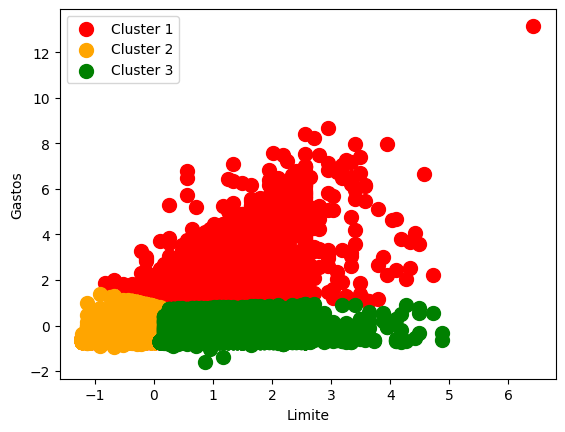

In [25]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1,1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();